# Titanic

## Objectif : 

L'objectif de ce modèle de ML est de prédire si un passager aurai survécu ou non au nauvrage du Titanic. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

**Nous allons commencer par analyser les datas :**

In [308]:
pd.set_option('display.max_column',12)
pd.set_option('display.max_rows',418)

In [4]:
df = data.copy()

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Taille du df** : (891, 12)  
**Nom du target** : Survived  
**Détail des variables** :  
int64   :      5  
object  :     5  
float64 :   2  

**Etude des NaN** :  
- On remarque que 3 variables ne sont pas complètes (Cabin (77%) , Age (20%), Embarked (<1%)) 

**Description des colonnes** :  
- *PassengerId* : l'id du passager (pas utile)  
- *Survived* : c'est la target  
- *Pclass* : c'est la classe du passager (1ere : 216, 2eme : 184, 3eme : 491)  
- *Name* : Nom des passager, pas important
- *Sex* : homme : 577 (65%) , femme : 314 (35%)  
- *Age* : distibution normale centrée sur 25 ans  
- *SibSp* : compte le nombre de frères/soeurs et d'épouses relié à la personne (beaucoup à 0) 
- *Parch* : compte le nombre de parents et d'enfants de la personne à bord (idem à comparer avec *SibSp*)  
- *Ticket* : numéro du ticket, pas utile  
- *Fare* : Beaucoup son peu cher, cela décroit exponentiellement  
- *Cabin* : Globalement vide, pas utile  
- *Embarked* : Donne le lieu d'embarquement : C = Cherbourg (168) , Q = Queenstown (77), S = Southampton (644)

In [6]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

<AxesSubplot:>

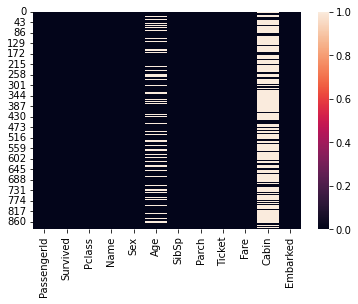

In [7]:
sns.heatmap(df.isna())

In [8]:
df.isna().sum()/df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
df['Sex'].value_counts()/df['Sex'].count()

male      0.647587
female    0.352413
Name: Sex, dtype: float64

C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

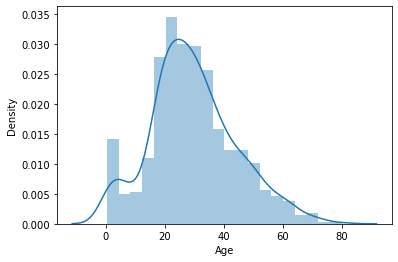

In [11]:
sns.distplot(df['Age'])

In [12]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

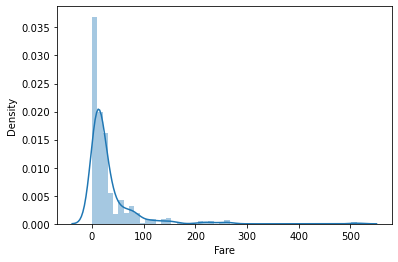

In [14]:
sns.distplot(df['Fare'])

In [15]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**On ne garde que les variables exploitables (qui ont un sens dans notre étude**

## Relation avec la target : 

**Nombre de survivant** : 342 (38%)  
**Relation Age/Survivant** : pas de relation apparente  
**Relation Fare/Survivant** : pas de relation apparente  
**Relation Embarked/Survivant** : il y a des différences ! ca peut être utile mais faire attention !!!   
**Relation Pclass/Survivant** : les classes les plus hautes ont plus survécues que les classes les + basses  
**Relation SibSp et Parch / Survivant** : les 0 on moins survécu que les 1 et 2 (proportionellement parlant)  
**Relation Sex/Survivant** : les femmes ont plus survécu que les hommes (cf titanic)

In [16]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
df['Survived'].value_counts()/df.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


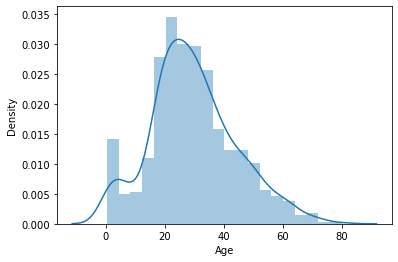

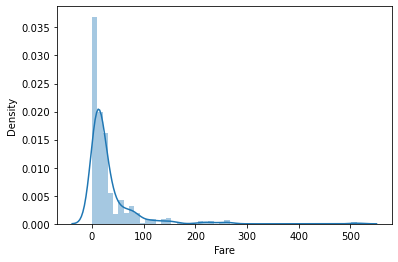

In [19]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

**On crée deux sous df pour les survivants et les non survivants :**

In [20]:
survivant = df[df['Survived'] == 1]
non_survivant = df[df['Survived'] == 0]

C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

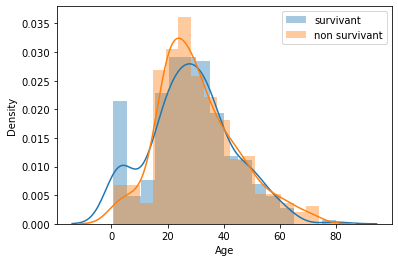

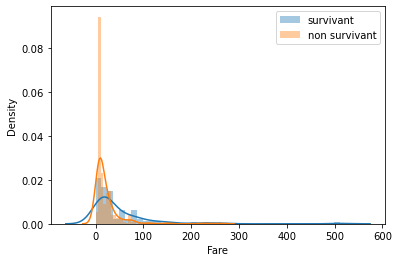

In [21]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(survivant[col],label='survivant')
    sns.distplot(non_survivant[col],label='non survivant')
    plt.legend()

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


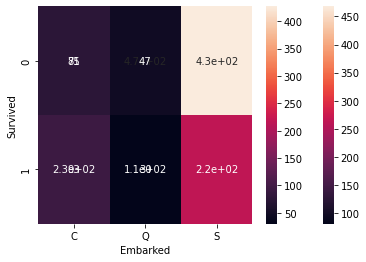

In [22]:
for col in df.select_dtypes('object'):
    pd.crosstab(df['Survived'],df[col])
    sns.heatmap(pd.crosstab(df['Survived'],df[col]), annot=True )
pd.crosstab(df['Survived'],df['Embarked'])

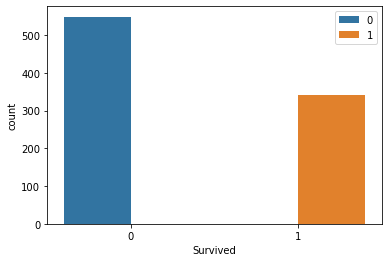

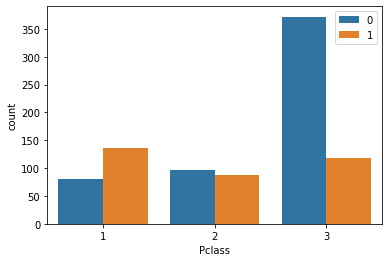

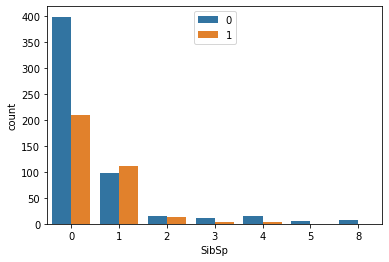

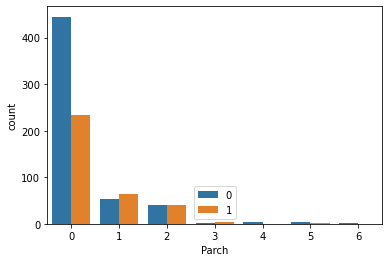

In [23]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.countplot(x = col, hue = 'Survived', data = df)
    plt.legend()

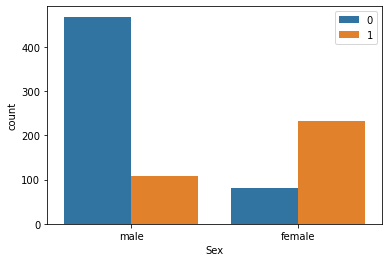

In [24]:
plt.figure()
sns.countplot(x = 'Sex', hue = 'Survived', data = df)
plt.legend()

### Relation entre les targets : 

- Pas de relation entre l'Age et Fare

**Remarque** : il faudra normaliser l'âge et fare ! 

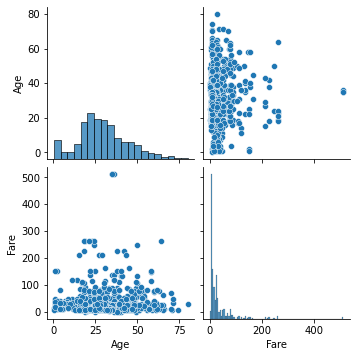

In [25]:
sns.pairplot(df.select_dtypes('float'))

In [26]:
df.select_dtypes('float').corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


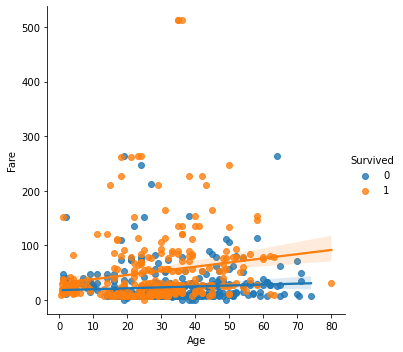

In [27]:
sns.lmplot( x='Age' ,  y = 'Fare' , hue = 'Survived' , data = df )

Comme nous avons remarqué des différences entre les gens seules et les autres, on va créer une nouvelle variable pour voir l'impact :  
Cette nouvelle variables confirme cette idée. Testons là avec un test de Student

In [28]:
df['seule'] = (df['SibSp'] == 0) &	(df['Parch'] == 0)

In [29]:
df['seule'].value_counts()

True     537
False    354
Name: seule, dtype: int64

In [30]:
survivant = df[df['Survived'] == 1]
non_survivant = df[df['Survived'] == 0]

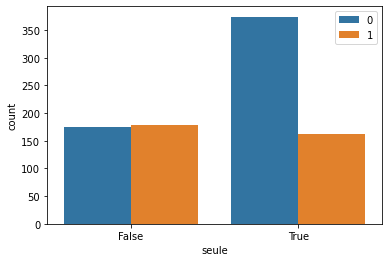

In [31]:
plt.figure()
sns.countplot(x = 'seule', hue = 'Survived', data = df)
plt.legend()

On pose l'hypothèse **H0** suivante :  
Les personnes qui ont survécu avait un entourage présent à bord significativement différent à bord ! 

In [32]:
from scipy.stats import ttest_ind

In [33]:
non_survivant_ned = non_survivant.sample(survivant.shape[0]) 

In [34]:
def t_test(col):
	alpha = 0.02
	stat, p = ttest_ind(non_survivant_ned[col].dropna(), survivant[col].dropna())
	if p < alpha : 
		return 'H0 rejetée '
	else : 
		return 0

In [35]:
print(t_test('seule'))

H0 rejetée 


# Preprocessing 

On commence par faire une copie de notre df, on sélectione les colonnes utiles et on crée notre train et testset en vérifiant que les proportions de survivant sont équivalentes.

In [150]:
df1 = data.copy()

In [151]:
df1 = df1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [152]:
from sklearn.model_selection import train_test_split 

In [153]:
trainset,testset = train_test_split(df1, test_size = 0.2, random_state=0)

In [40]:
trainset['Survived'].value_counts()/trainset.shape[0]

0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [41]:
testset['Survived'].value_counts()/testset.shape[0]

0    0.614525
1    0.385475
Name: Survived, dtype: float64

## Encodage : 

Ici, nous allons encoder les variables de types Object à l'aide d'un dictionnaire

In [42]:
def encodage(df):
    
    code = {'male':0,
            'female':1,
            'C':0,'Q':1,'S':2}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col]=df[col].map(code)
    
    return df

In [43]:
def feature_engineering(df):
    df['seule'] = (df['SibSp'] == 0) &	(df['Parch'] == 0)
    df = df.drop(['SibSp','Parch'],axis=1)
    return df

In [44]:
def imputation(df):
    df = df.dropna()
    return df

In [45]:
def preprocessing(df):

    df = encodage(df)
    #df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('Survived',axis=1)
    y = df['Survived']
    
    print(y.value_counts())
    
    return X,y

In [46]:
X_train , y_train = preprocessing(trainset)

0    340
1    229
Name: Survived, dtype: int64


C:\Users\valen\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [47]:
X_test , y_test = preprocessing(testset)

0    84
1    59
Name: Survived, dtype: int64


# Model 

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [49]:
model = DecisionTreeClassifier(random_state = 0 )

## Procédure d'évalutation 

In [50]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [51]:
def evaluation(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes = np.linspace(0.1,1,10))

    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1))
    plt.plot(N, val_score.mean(axis=1))

[[72 12]
 [16 43]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        84
           1       0.78      0.73      0.75        59

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.80       143
weighted avg       0.80      0.80      0.80       143



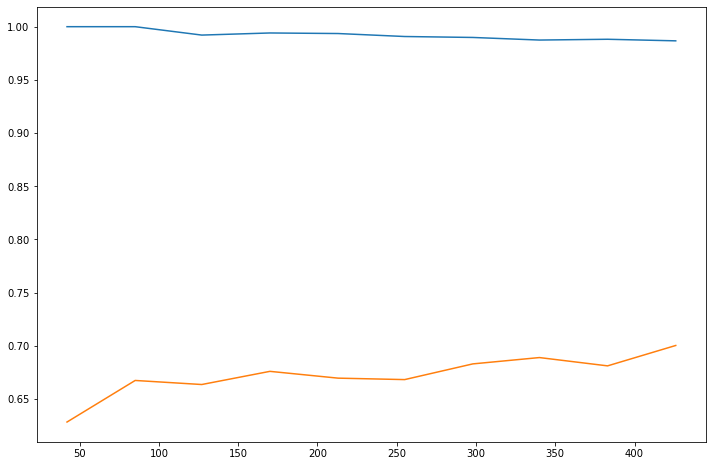

In [52]:
evaluation(model)

Le premier modèle nous donne des performances pas mauvaise ( 12 sur les décédés et 16 erreurs sur les survivants)  
On remarque un début de fin d'overfitting à voir si on peut améliorer cela !

<AxesSubplot:>

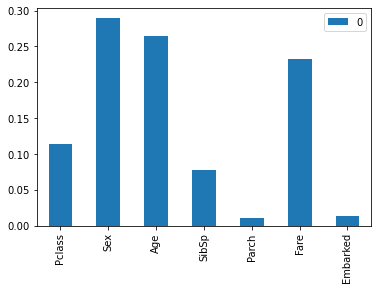

In [53]:
pd.DataFrame(model.feature_importances_ , index = X_train.columns).plot.bar()

Essayons de voir si en mettant notre colonne de présence de famille dans le bateau et en supprimant *SibSp* et *Pearch* nous obtenons de meilleurs résultats :  
- *seule* reste une variable pas très utile (moins de 0.05% d'utilité...)  

Comme nous sommes toujours en *overfitting* nous allons mettre un **RandomForest** qui est un modèle qui lutte contre cela 
- On obtient de meilleurs résultat avec la random forest mais tjrs en overfeating, on testera d'autres modèles plus tard  

In [54]:
model_2 = RandomForestClassifier(random_state = 0)

[[75  9]
 [13 46]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        84
           1       0.84      0.78      0.81        59

    accuracy                           0.85       143
   macro avg       0.84      0.84      0.84       143
weighted avg       0.85      0.85      0.85       143



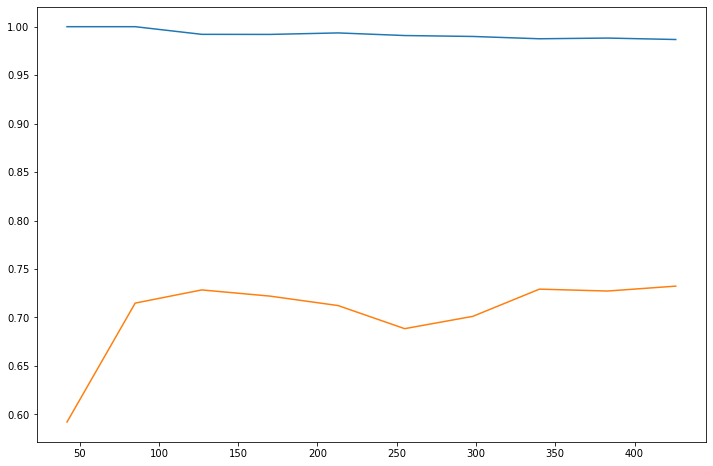

In [55]:
evaluation(model_2)

<AxesSubplot:>

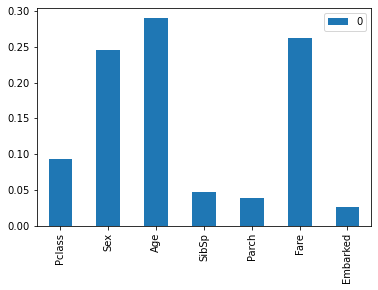

In [56]:
pd.DataFrame(model_2.feature_importances_ , index = X_train.columns).plot.bar()

Nous allons maintenant faire du feature selection, pour cela nous allons créer une pipeline puis sélectionner les variables les plus utiles selon le critère f1 avec le test d'**Anova**.

In [57]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest , f_classif
from sklearn.preprocessing import PolynomialFeatures

In [58]:
model_3 = make_pipeline(SelectKBest(k=5),RandomForestClassifier(random_state = 0))

[[76  8]
 [14 45]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        84
           1       0.85      0.76      0.80        59

    accuracy                           0.85       143
   macro avg       0.85      0.83      0.84       143
weighted avg       0.85      0.85      0.84       143



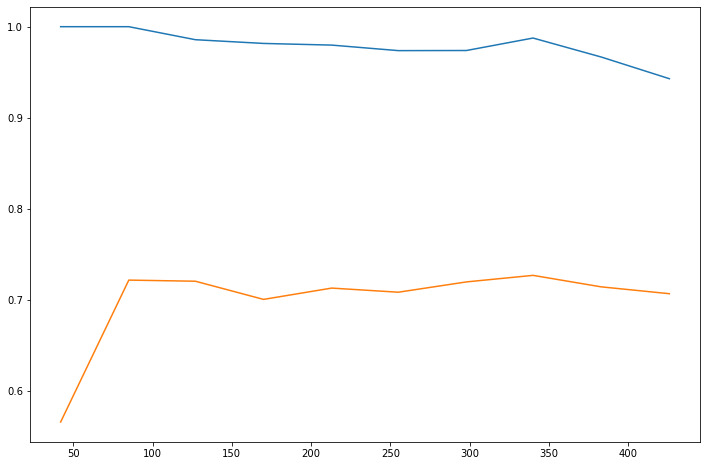

In [59]:
evaluation(model_3)

In [60]:
model_4 = make_pipeline(PolynomialFeatures(3,include_bias=False),SelectKBest(k=5),RandomForestClassifier(random_state = 0))

[[73 11]
 [17 42]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        84
           1       0.79      0.71      0.75        59

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143



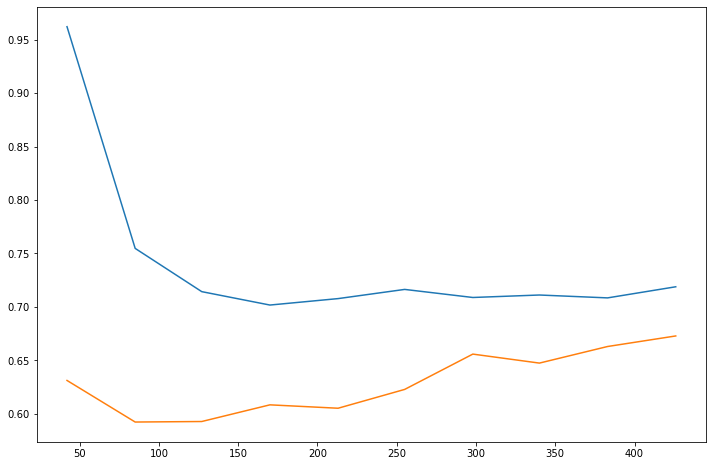

In [61]:
evaluation(model_4)

On commenca à avoir quelque chose qui quitte l'overfitting, nous allons maintenant essayer différents modèles de ML d'en sélectioner et de les optimiser pour avoir la meilleur accuracy possible !

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [63]:
preprocessing = make_pipeline(PolynomialFeatures(3,include_bias=False),SelectKBest(k=5))

In [64]:
RandomForest = make_pipeline( preprocessing , RandomForestClassifier(random_state = 0))

In [65]:
AdaBoostClassifier_ = make_pipeline( preprocessing , StandardScaler() , AdaBoostClassifier(random_state = 0))

In [66]:
SVM = make_pipeline( preprocessing , StandardScaler() , SVC(random_state = 0))

In [67]:
KNeighborsClassifier = make_pipeline( preprocessing , StandardScaler() , KNeighborsClassifier())

In [70]:
dict_of_model={'RandomForest' : RandomForest,
       'AdaBoostClassifier' : AdaBoostClassifier_,
       'SVM' : SVM,
       'KNeighborsClassifier' : KNeighborsClassifier }

RandomForest
[[73 11]
 [17 42]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        84
           1       0.79      0.71      0.75        59

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143

AdaBoostClassifier
[[68 16]
 [14 45]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        84
           1       0.74      0.76      0.75        59

    accuracy                           0.79       143
   macro avg       0.78      0.79      0.78       143
weighted avg       0.79      0.79      0.79       143

SVM
[[68 16]
 [14 45]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        84
           1       0.74      0.76      0.75        59

    accuracy                           0.79       143
   macro avg       0.78      0.79  

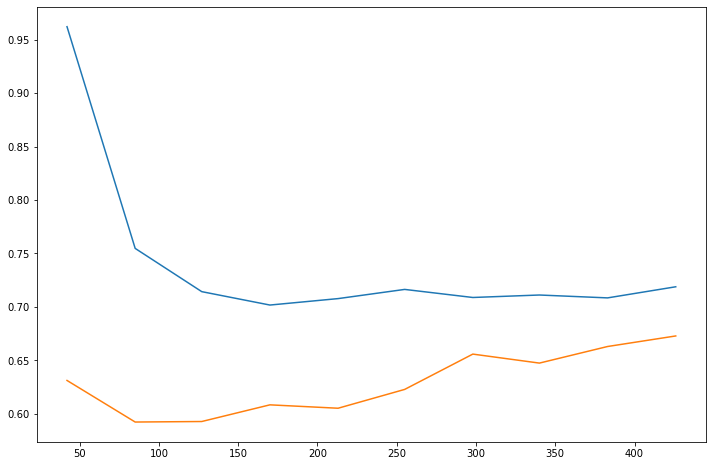

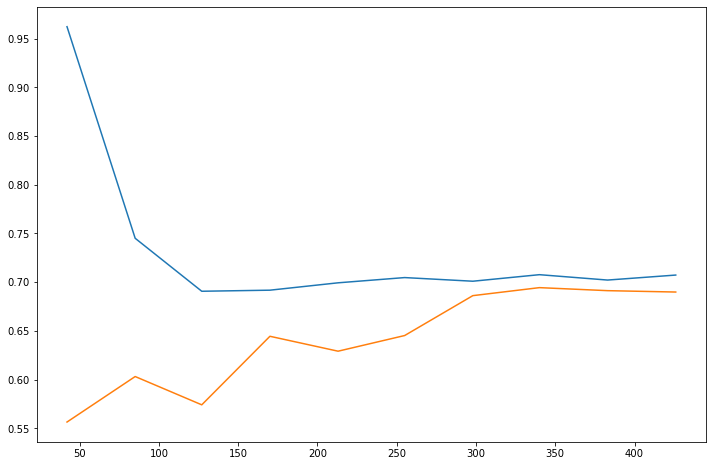

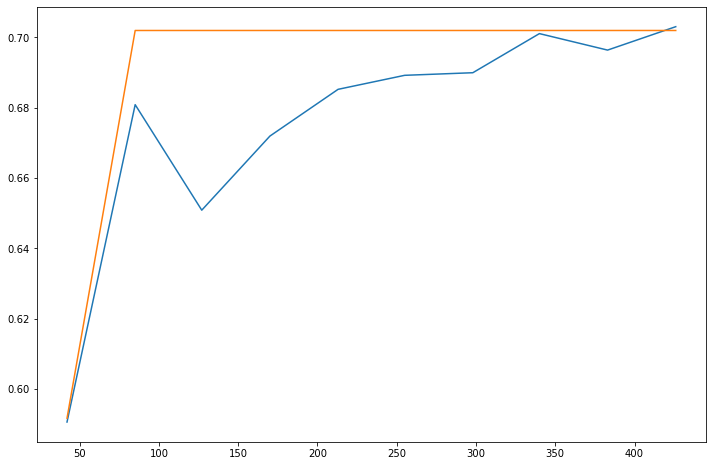

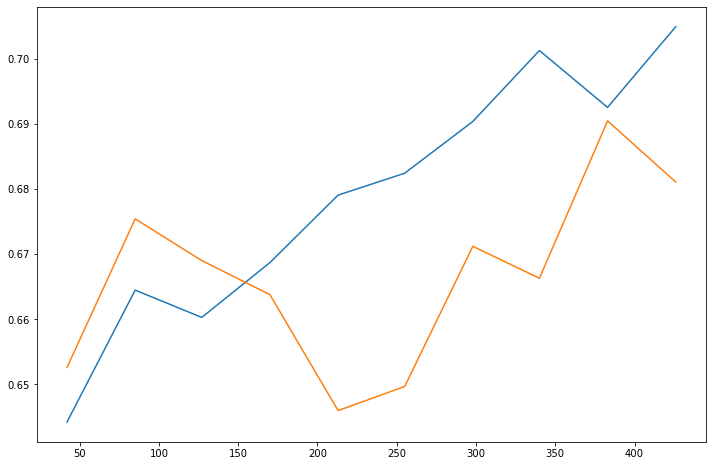

In [71]:
for name , model in dict_of_model.items() :
    print(name)
    evaluation(model)

Les modèles nous donnes à peu près les mêmes résultats, cependant, le *AdaBoostClassifier* à l'air d'avoir convergé, on va donc essayer d'améliorer ses hyperparamètres pour avoir de meilleurs perfs.  
On remarque que le dernier modèle (*KNeighborsClassifier*) est toujours entrain d'apprendre, il y a du potentiel !from sklearn.model_selection import GridSearchCV

**Amélioration du *AdaBoostClassifier***

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
AdaBoostClassifier_

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=False)),
                                 ('selectkbest', SelectKBest(k=5))])),
                ('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier(random_state=0))])

In [74]:
hyperpara = {'pipeline__polynomialfeatures__degree' : [1],
             'pipeline__selectkbest__k' : [7],
            'adaboostclassifier__learning_rate' : [0.5,0.8],
            'adaboostclassifier__n_estimators' : [100,200]}

In [75]:
grid = GridSearchCV(AdaBoostClassifier_, hyperpara, scoring = 'accuracy', cv = 4)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'adaboostclassifier__learning_rate': 0.8, 'adaboostclassifier__n_estimators': 100, 'pipeline__polynomialfeatures__degree': 1, 'pipeline__selectkbest__k': 7}


In [76]:
y_pred = grid.predict(X_test)

[[70 14]
 [10 49]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        84
           1       0.78      0.83      0.80        59

    accuracy                           0.83       143
   macro avg       0.83      0.83      0.83       143
weighted avg       0.83      0.83      0.83       143



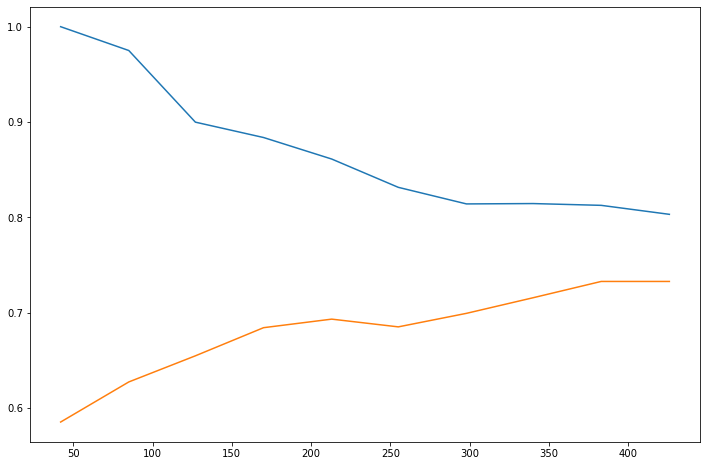

In [78]:
evaluation(grid.best_estimator_)

In [79]:
from sklearn.metrics import precision_recall_curve

In [81]:
precision, recall, threshold = precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))

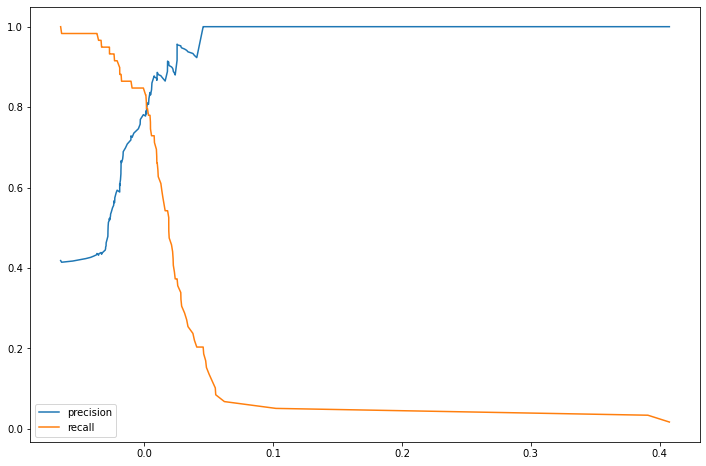

In [86]:
plt.figure(figsize=(12,8))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [87]:
def model_final(model, X , threshold=0):
    return model.decision_function(X) > threshold

In [104]:
y_pred = model_final(grid.best_estimator_, X_test, threshold = 0.005)

In [105]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[76  8]
 [16 43]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        84
           1       0.84      0.73      0.78        59

    accuracy                           0.83       143
   macro avg       0.83      0.82      0.82       143
weighted avg       0.83      0.83      0.83       143



Comme dans le fichier de test, la colonne *Age* est vide à 20% on va dévelloper un modèle sans la colonne age pour ces cas là.  


# Modèle sans la colonne Age : 

On s'aperçois que le modèle d'AdaBoostClassifier fonctionne bien, dans un premier temps, on le prendra avec ses paramètres de bases pour construire notre pipeline complète

In [149]:
def preprocessing_sans_age(df):

    df = encodage(df)
    #df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop(['Survived','Age'],axis=1)
    y = df['Survived']
    
    print(y.value_counts())
    
    return X,y

In [176]:
X_train_sans , y_train_sans = preprocessing_sans_age(trainset)

0    340
1    229
Name: Survived, dtype: int64


In [179]:
X_test_sans, y_test_sans = preprocessing_sans_age(testset)

0    84
1    59
Name: Survived, dtype: int64


In [160]:
model = RandomForestClassifier(random_state = 0)

[[68 16]
 [13 46]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        84
           1       0.74      0.78      0.76        59

    accuracy                           0.80       143
   macro avg       0.79      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143



<AxesSubplot:>

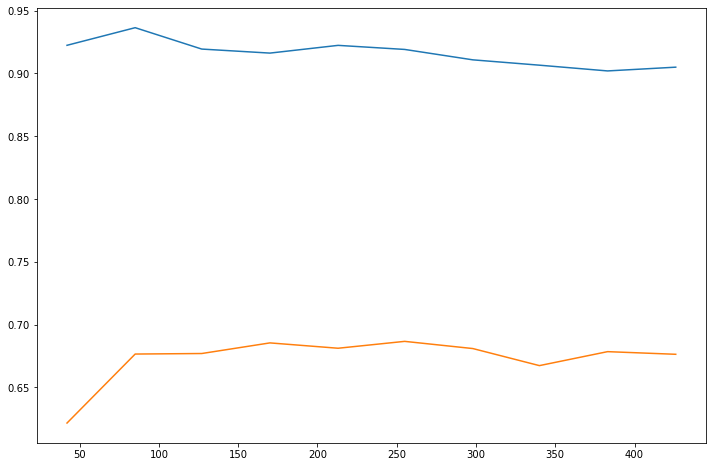

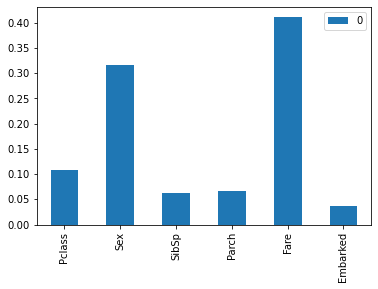

In [161]:
evaluation(model)
pd.DataFrame(model.feature_importances_ , index = X_train_sans.columns).plot.bar()

RandomForest
[[68 16]
 [14 45]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        84
           1       0.74      0.76      0.75        59

    accuracy                           0.79       143
   macro avg       0.78      0.79      0.78       143
weighted avg       0.79      0.79      0.79       143

AdaBoostClassifier
[[68 16]
 [14 45]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        84
           1       0.74      0.76      0.75        59

    accuracy                           0.79       143
   macro avg       0.78      0.79      0.78       143
weighted avg       0.79      0.79      0.79       143

SVM
[[68 16]
 [14 45]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        84
           1       0.74      0.76      0.75        59

    accuracy                           0.79       143
   macro avg       0.78      0.79  

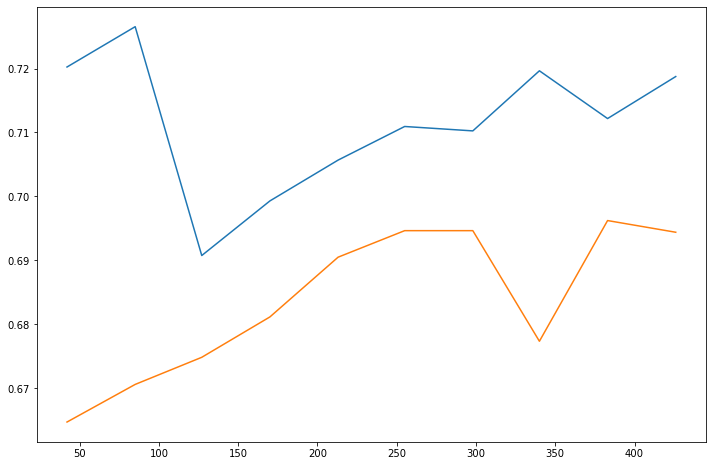

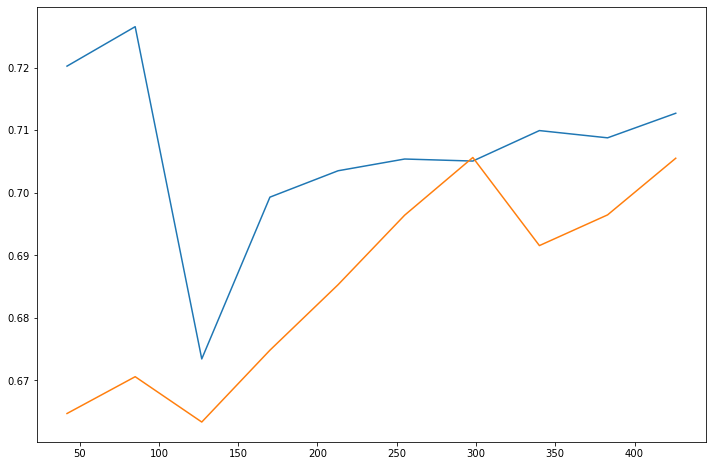

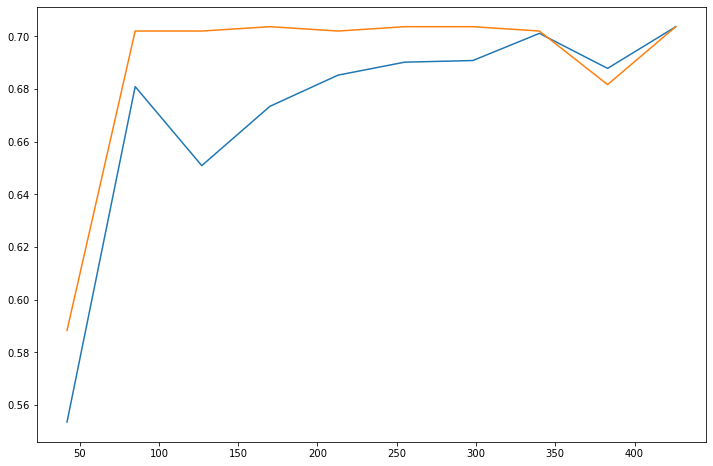

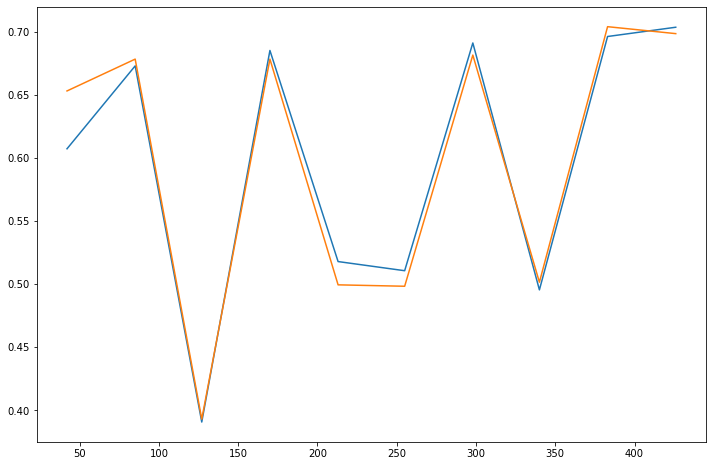

In [162]:
for name , model in dict_of_model.items() :
    print(name)
    evaluation(model)

**Construction de la pipeline complète**

In [165]:
def separation(df):
    return df[df['Age'].isna()] , df[df['Age'].notna()]

In [172]:
model_sans = RandomForestClassifier(random_state = 0)

In [177]:
model_sans.fit(X_train_sans,y_train_sans)

RandomForestClassifier(random_state=0)

In [181]:
y_pred_sans = model_sans.predict(X_test_sans)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S


# Mise en Forme et soumissions des réponses pour Kaggle

In [306]:
data_test = pd.read_csv('test.csv')

In [288]:
data_test.isna().sum()/data_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [311]:
def final_model(df):
    df = df.drop(['Name','Ticket','Cabin'],axis=1)
    df = encodage(df)
    df.loc[df['Fare'].isna()] = df['Fare'].mean() 
    
    df_sans_age,df_avec_age  = separation(df)
    
    df_sans_age = df_sans_age.drop('Age',axis=1)
    
    
    #df_avec_age = imputation(df_avec_age)
    #df_sans_age = imputation(df_sans_age)
    
    df_avec_age_ID = df_avec_age['PassengerId']
    df_sans_age_ID = df_sans_age['PassengerId']
    
    df_avec_age = df_avec_age.drop('PassengerId',axis=1)
    df_sans_age = df_sans_age.drop('PassengerId',axis=1)
    
    
    predict_avec = grid.best_estimator_.predict(df_avec_age)
    predict_sans = model_sans.predict(df_sans_age)
    
    df_sans_age['Survived'] = predict_sans
    df_avec_age['Survived'] = predict_avec
    
    df_sans_age['PassengerID'] = df_sans_age_ID
    df_avec_age['PassengerID'] = df_avec_age_ID
    
    df_result = df_avec_age.join(df_sans_age, on='PassengerID',how = 'outer')
    
    print(df_result.head())
    
    return pd.DataFrame({'PassengerID': df_result['PassengerID'], 'Survived': df_result_['Survived']})
    

In [312]:
df_result = final_model(data_test)

C:\Users\valen\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1204: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


ValueError: columns overlap but no suffix specified: Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived',
       'PassengerID'],
      dtype='object')

In [307]:
data_test.shape

(418, 11)

In [303]:
df_result.to_csv('submission.csv', index=False)

In [141]:
def transfo_df(réponse):
    codage = {False : 0,
              True : 1}
    réponse = pd.DataFrame({'Id': data_test.index.tolist(), 'Survived': réponse})
    
    réponse = réponse['Survived'].map(codage)
    
    return réponse

In [142]:
df_test = transfo_df(y_test)

ValueError: All arrays must be of the same length

In [144]:
y_test.shape

(331,)